# Regressão Linear 
***

## Índice

1. [Importando bibliotecas](#importando-bibliotecas)
2. [Análise do dataset](#análise-do-dataset)
3. [Treinamento do modelo](#treinamento-do-modelo)
4. [Região de decisão](#região-de-decisão)
5. [Regressão Linear](#regressão-linear)
6. [Referências](#referências)

## Importanto Bibliotecas

In [2]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
from sklearn.linear_model import LinearRegression

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Análise do dataset

**House**: A tarefa é prever o preço médio da casa na região com base na composição demográfica e no estado do mercado imobiliário na região. Descrição [link](https://sci2s.ugr.es/keel/dataset.php?cod=95#sub1).

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Francimaria/monitoria-ml/main/house.csv")

In [7]:
dataset.columns

Index(['Price', 'P1', ' P5p1', ' P6p2', ' P11p4', ' P14p9', ' P15p1', ' P15p3',
       ' P16p2', ' P18p2', ' P27p4', ' H2p2', ' H8p2', ' H10p1', ' H13p1',
       ' H18pA', ' H40p4'],
      dtype='object')

In [8]:
# vamos olhar para uma pequena parte do dataset
dataset.head()

,Price,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
0,14999,219,0.506849,0.031963,0.146119,0.101852,0.876712,0.000000,0.746988,0.012048,0.060241,0.231482,0.024096,0.987952,0.351852,0.000000,0.800000
1,106200,2273,0.495381,0.018918,0.067312,0.045336,0.794545,0.016718,0.641053,0.002105,0.076842,0.064961,0.017895,0.997895,0.170276,0.054217,0.258064
2,14999,564,0.457447,0.058511,0.299645,0.238562,0.764184,0.010638,0.567273,0.003636,0.014545,0.140625,0.054545,0.996364,0.381250,0.056180,1.000000
3,29900,620,0.495161,0.003226,0.104839,0.086262,0.909677,0.000000,0.792793,0.009009,0.027027,0.051282,0.004504,0.995495,0.183761,0.162791,0.000000
4,85900,3809,0.491730,0.205303,0.107115,0.085744,0.899449,0.000000,0.766566,0.008283,0.039910,0.017024,0.200301,0.985693,0.198372,0.106557,0.666667


## Treinamento do modelo

In [7]:
# para treinar e avaliar um classificador, precisamos dividir o dataset em dois conjuntos, ...
X_train, X_test, y_train, y_test = train_test_split(filtered_X[[feature_0, feature_1]], filtered_y, test_size=0.3, random_state=199)

# ... referenciar e treinar o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# qual o resultado para esse classificador?
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.82      0.92      0.87        25

    accuracy                           0.82        39
   macro avg       0.82      0.78      0.79        39
weighted avg       0.82      0.82      0.81        39



## Região de decisão

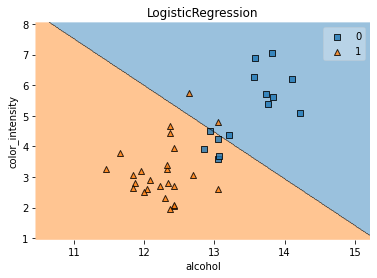

In [9]:
# vamos criar uma função que nos ajude a observar a região de decisão do classificador
def show_decision_region(x, y, clf, f0, f1):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    plt.title(clf.__class__.__name__)
    plt.show()

show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)

In [10]:
# como o classificador se comporta com três classes?
X_train, X_test, y_train, y_test = train_test_split(X[[feature_0, feature_1]], y, test_size=0.3, random_state=199)
model = LogisticRegression()
model.fit(X_train, y_train)

# quais os resultados para esse classificador?
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.88      0.96      0.92        24
           2       0.86      0.50      0.63        12

    accuracy                           0.83        54
   macro avg       0.83      0.78      0.79        54
weighted avg       0.84      0.83      0.82        54



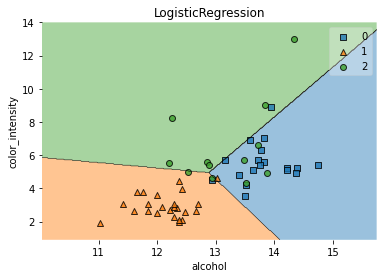

In [11]:
show_decision_region(
    np.stack(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ],
        axis=1
    ), 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)

Como é possível um classificador linear classificar três classes?

## Regressão Linear

A regressão linear funciona de forma similar à regressão logística. Entretanto, é um modelo de regressão, e não de classificação. Com ela, podemos relacionar duas variáveis a partir de uma equação linear. Vamos desconsiderar as classes no nosso dataset de vinhos e relacionar as features _alcohol_ e _color_intensity_.

Lembrando da fómula da equação linear: $y = a \times x  + b$

In [33]:
# vamos apenas escolher duas features, uma para ser o x, outra para ser o y da nossa regressão
feature_0 = "alcohol"
feature_1 = "color_intensity"

X_train, X_test, y_train, y_test = train_test_split(filtered_X[[feature_0]].values, filtered_X[[feature_1]].values, test_size=0.3, random_state=199)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

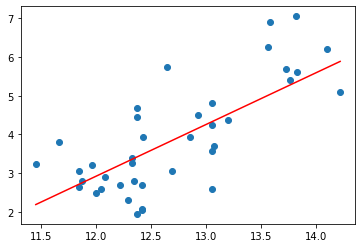

In [17]:
# vamos definir uma simples função para plotar a reta
def plot_regression_line(x, model):
    a = model.coef_[0] # coef_ é o coeficiente da reta (a)
    b = model.intercept_[0] # intercept_ é o termo independente (b)
    x = np.linspace(x.min(), x.max(), 50)
    plt.plot(x, a*x+b, linestyle='-', color="r")

plot_regression_line(X_test, regression_model)

plt.scatter(X_test, y_test)

## Referências

[1] [Identification of red wine categories based on physicochemical properties. Bai, Xueting and Wang, Lingbo and Li, Hanning. International Conference on Education Technology, Management and Humanities Science (ETMHS 2019)](https://www.webofproceedings.org/proceedings_series/ESSP/ETMHS%202019/ETMHS19309.pdf)